In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
sns.set
%matplotlib inline


In [2]:
# importing the dataset
itv_data = pd.read_csv("DIG_step_up_user_data.csv", index_col = "user_id")

In [3]:
itv_data.head()

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,...,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,True,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,0.000000,...,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,True,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,0.000000,...,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,4.658504,...,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36.0,Prefer not to answer
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,0.000000,...,NaN,0.000000,0.000000,1.0,70648.591664,176989.167344,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,NaN


In [4]:
itv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, #ERROR! to zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   n_sessions                                     1771 non-null   int64  
 1   n_programmes_watched                           1771 non-null   int64  
 2   n_episodes_watched                             1771 non-null   int64  
 3   top_3_programmes                               1771 non-null   object 
 4   top_3_genres                                   1745 non-null   object 
 5   total_genre_comedy_consumption_seconds         1771 non-null   float64
 6   total_genre_drama_consumption_seconds          1771 non-null   float64
 7   total_genre_entertainment_consumption_seconds  1771 non-null   float64
 8   total_genre_sport_consumption_seconds          1771 non-null   float64
 9   total_genre

In [5]:
#let's explore the data using its descriptive statistics
pd.set_option('display.max_columns', 500)
itv_data.describe()

,n_sessions,n_programmes_watched,n_episodes_watched,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,age
count,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1640.000000,1.698000e+03,1771.000000,1771.000000,1745.000000,1771.000000,1.676000e+03,1658.000000
mean,29.957651,7.020327,20.217956,725.233787,25707.076022,9988.012809,5504.614528,2463.992048,1364.314099,2774.015108,245.599083,688.586986,110.354623,96.918923,4742.140506,8407.816354,19774.847978,13208.899978,4.330568e+04,1606.325537,1191.880807,1.449857,13468.638911,4.559467e+04,34.939083
std,52.824300,9.913618,35.352717,8587.747771,61589.113734,28042.098335,18455.430161,9082.034712,5368.058386,5481.123583,1407.013797,3556.378598,564.122317,680.991461,14771.746991,20208.505499,36174.218977,37878.744458,8.400279e+04,12708.627053,8397.316785,0.701351,25705.344395,8.213161e+04,5.074630
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,2.340000e-01,18.000000
25%,4.000000,2.000000,4.000000,0.000000,182.433568,0.000000,0.000000,0.000000,0.000000,153.672501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1459.393402,0.000000,2.906464e+03,0.000000,0.000000,1.000000,103.077915,5.332510e+03,32.000000
50%,12.000000,4.000000,8.000000,0.000000,6782.458000,324.627000,0.000000,0.000000,0.000000,892.577800,0.000000,0.000000,0.000000,0.000000,0.000000,1025.365000,6943.563000,3335.135500,1.466602e+04,0.000000,0.000000,1.000000,4694.704000,1.743006e+04,35.000000
75%,32.500000,8.000000,21.000000,0.000000,25035.219000,7437.641768,1649.630162,292.404000,9.376127,2906.994168,39.433400,4.369248,0.000000,0.000000,2805.061500,7178.964769,22215.852458,11922.773000,4.397354e+04,0.000000,0.000000,2.000000,14555.852438,4.754841e+04,38.000000
max,686.000000,111.000000,407.000000,330652.936092,968471.926790,425848.615310,228739.002166,153076.992654,89798.864367,54950.357207,49007.474514,68428.973092,8918.698256,14704.998240,189202.347000,332942.251944,446846.432941,774244.753000,1.016244e+06,468060.331391,190693.607924,10.000000,279514.865511,1.016244e+06,50.000000


In [6]:
# to include the categorical variables
itv_data.describe(include = "object")

,top_3_programmes,top_3_genres,top_3_subgenres,gender
count,1771,1745,1771,1691
unique,1340,107,782,4
top,['A SPY AMONG FRIENDS'],['DRAMA'],['CRIME AND THRILLER'],Male
freq,99,336,130,671


### Data Cleaning 

In [7]:
itv_data.isnull().sum()

n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                      26
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds          0
total_watch_dinner_consumption_seconds        

In [8]:
# some value in the top_3_genres column contains NAN, there is a need to clean that
top_3_genres_with_null = itv_data[itv_data["top_3_genres"].isnull()]
top_3_genres_with_null

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34qq/LCqiErVpuyEDFyPCEPZXADC6GId0qMz3pMKXxA=,80,8,48,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...",NaN,0.000,49654.812000,59980.330000,15006.436342,0.000000,0.000,9865.306034,0.0000,1419.8776,0.0,0.000000,15642.019057,53273.302778,39391.579507,16334.67700,124641.578342,0.000000,0.000000,NaN,22137.977051,124641.578342,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
3dgSJIH2S9EWaAWspEQjzFNEXitcaHPBJev/Rwznlbk=,7,2,3,"['THE SUSPECT', 'A SPY AMONG FRIENDS']",NaN,0.000,5986.245000,0.000000,0.000000,0.000000,0.000,551.833300,0.0000,0.0000,0.0,0.000000,467.912000,5518.333000,0.000000,0.00000,5986.245000,0.000000,0.000000,NaN,5518.333000,5986.245000,True,['CRIME AND THRILLER'],40.0,Male
3h10Tx5p163QrA1YscQPVZdHIwrpqVhLa862C8euIec=,21,10,16,"['THE VOICE', 'A SPY AMONG FRIENDS', 'DOC MART...",NaN,0.000,24543.208000,15072.229451,0.000000,24.431104,505.000,3025.266056,0.0000,50.5000,0.0,0.000000,0.000000,2664.568000,34933.300555,2547.00000,40144.868555,0.000000,0.000000,NaN,12131.267298,40144.868555,True,"['FAMILY', 'TALENT SHOWS', 'COMEDY']",40.0,Male
5g7WtW+iPUyZjTAqql4Kf7okijsBjqLroOgSsT7h+h4=,24,3,13,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'THE W...",NaN,0.000,22195.715000,0.000000,0.000000,0.000000,0.000,17.086900,0.0000,1131.1455,0.0,0.000000,1788.281000,1758.782000,18640.790000,7.86200,22195.715000,0.000000,0.000000,NaN,11110.211000,22195.715000,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",39.0,Female
8BKNX3fvY+zCTXu7yLR65HVOcEshYaU/GjvRcwhad0o=,2,1,1,['SNOOKER: CHAMPION OF CHAMPIONS'],NaN,0.000,0.000000,0.000000,4476.583000,0.000000,0.000,0.000000,0.0000,0.0000,0.0,447.658300,0.000000,0.000000,4476.583000,0.00000,4476.583000,0.000000,0.000000,NaN,0.000000,4476.583000,False,"['EVENT', 'SNOOKER']",35.0,Male
9dHIFQkHMZ8izvhAC3QQeSkO2BCp2Rry00UmmMpzU84=,20,5,18,"['CATCHPHRASE', 'WORLD CUP', 'A SPY AMONG FRIE...",NaN,0.000,4470.305000,23878.824000,7489.603779,0.000000,0.000,1700.651778,1714.5907,0.0000,0.0,0.000000,0.000000,4028.451796,24256.887983,7553.39300,35838.732779,0.000000,0.000000,NaN,7389.373671,35838.732779,True,"['QUIZ AND GAME SHOWS', 'FOOTBALL', 'EVENT']",31.0,Female
Cu1QB+B9jtRtzIZ9Dy2KLqib6g7cT7UXCjnip39g38E=,5,3,3,"['THIS HAPPY BREED', 'WORLD CUP', 'THIS MORNING']",NaN,0.000,0.000000,3230.999190,6023.768642,3066.987000,0.000,925.476783,0.0000,0.0000,0.0,0.000000,0.000000,4570.490190,7751.264642,0.00000,1339.491000,0.000000,10982.263832,NaN,9090.755642,NaN,False,"['SOCIAL REALISM', 'COMEDY', 'FOOTBALL']",31.0,Male
FlSztVOfjoR+cIxKZPk4ULree+SApJQSMHEj+6W39E0=,91,17,50,"['ANY HUMAN HEART', 'A CONFESSION', 'RECKLESS']",NaN,0.000,126049.945032,317.205000,0.000000,294.485000,0.000,3302.988803,0.0000,3736.1895,0.0,0.000000,2780.788000,10586.908000,105414.617032,NaN,126661.635032,0.000000,0.000000,NaN,26801.963000,126661.635032,True,"['CRIME AND THRILLER', 'SOCIAL DRAMA', 'BASED ...",32.0,Male
GpOjr61arLAL+9pKwVFm+G2aUo2PEIMLFuBGbb0/l2g=,28,3,10,"['WORLD CUP', 'A SPY AMONG FRIENDS', 'WITHOUT ...",NaN,0.000,20931.236000,0.000000,4845.488149,0.00

In [9]:
# to clean the NAN in the top_3_genres column, i decided to use its corresponding top_3_subgenres column

# an empty list to store the mode of the top_3_genres of each top_3_subgenres that will replace the NAN
nan_replaced_top_3_genres = []

# looping over the rows in the top_3_genres_with_null
for index, row in top_3_genres_with_null.iterrows():
    try:
        t = row["top_3_subgenres"]
        
        # here, I iterate over the rows in the itv_data with the same value of top_3_subgenres as the top_3-genres_with_null
        # then gets the top_3_genres of those rows in itv_data and return the mode as the top_3_genres of the rows in top_3-genres_with_null
        g = itv_data[itv_data["top_3_subgenres"] == t]["top_3_genres"].value_counts().index[0]
        
    #if the "Index 0 is out of bounds for axis 0 with size 0" error is raised, the except block will be executed
    except IndexError:
        g = np.nan
    nan_replaced_top_3_genres.append(g)


In [10]:
# replacing the NAN with new list
itv_data.loc[itv_data["top_3_genres"].isnull(), "top_3_genres"] = nan_replaced_top_3_genres

In [11]:
mode = itv_data["top_3_genres"].mode()
mode

0    ['DRAMA']
Name: top_3_genres, dtype: object

In [12]:
# there are still some rows whose top_3_genres is NAN, these are the rows with a unique top_3_subgenres
# i will be replacing thus with the mode of the top_3_genres in the itv_data, which is "DRAMA"

itv_data.loc[itv_data["top_3_genres"].isnull(), "top_3_genres"] = mode[0]

In [13]:
# this shows the top_3_genres column no longer has a NAN value
itv_data.isnull().sum()

n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                       0
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds          0
total_watch_dinner_consumption_seconds        

In [14]:
pd.set_option('display.max_columns', 500)
itv_data[itv_data["total_watch_night_consumption_seconds"].isnull()]

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+PDN5TuwsCX8wkJn7zYn8Xuam7dH4MNfeywFIX53f80=,34,6,14,"['A SPY AMONG FRIENDS', 'STONEHOUSE', 'KAREN P...","['DRAMA', 'OTHER']",0.0,37373.85100,0.000000,0.000000,48.108000,0.000,1471.294100,0.0000,8.7875,0.0000,0.000000,4779.086,24677.723000,5628.539000,NaN,37421.959000,0.000000,0.000000,1.0,6708.169000,37421.959000,True,"['CRIME AND THRILLER', 'CRIME', 'DRAMA']",34.0,Prefer not to answer
/CDTrXH8t16xrm7L9F6X4CIhyMETplvUMldInRinFlI=,5,1,3,"[""I'M A CELEBRITY... GET ME OUT OF HERE!""]",['ENTERTAINMENT'],0.0,0.00000,5288.987421,0.000000,0.000000,0.000,528.898742,0.0000,0.0000,0.0000,0.000000,0.000,0.000000,0.000000,NaN,0.000000,2741.635910,2547.351511,2.0,0.000000,5288.987421,False,['CELEBRITY'],31.0,Prefer not to answer
/F+Ht+XG55kwVP9ttZqY+kut+3Ue3X1wueG8b5tcfyU=,4,2,4,"['LOADED IN PARADISE', 'JOHN WICK']","['FACTUAL', 'OTHER']",0.0,0.00000,0.000000,0.000000,3.571327,3995.445,0.357133,399.5445,0.0000,0.0000,0.000000,2724.964,0.000000,1270.481000,NaN,0.000000,3999.016327,0.000000,1.0,3.571327,3999.016327,False,"['ENTERTAINMENT', 'ACTION AND ADVENTURE', 'THR...",28.0,Female
/hZSighcywFQ1WEqjiEpKg57I/hNyPPM7dMLrKOuh4c=,25,7,17,"['RICHES', 'FA CUP', 'WITHOUT SIN']","['DRAMA', 'SPORT', 'FACTUAL']",0.0,20847.11800,0.000000,140.259947,2263.839000,732.001,2056.172195,226.3839,0.0000,0.0000,0.000000,0.000,0.000000,7784.517000,NaN,23983.217947,0.000000,0.000000,1.0,10208.894000,23983.217947,True,"['DRAMA', 'CRIME AND THRILLER', 'FOOTBALL']",30.0,Other
1wskT7HC25JSTWoMK5s2XaF7cCVPcwWrDemj1gZX/Qs=,2,1,2,"[""I'M A CELEBRITY... GET ME OUT OF HERE!""]",['ENTERTAINMENT'],0.0,0.00000,3240.271000,0.000000,0.000000,0.000,324.027100,0.0000,0.0000,0.0000,0.000000,0.000,251.244000,0.000000,NaN,0.000000,3240.271000,0.000000,1.0,3240.271000,3240.271000,False,['CELEBRITY'],32.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xihzk7Hgdw321H+0WWhW/s5ia7o3N8AHMJ8Yij8TXoA=,32,9,24,"['WORLD CUP', 'FA CUP', 'A SPY AMONG FRIENDS']","['SPORT', 'DRAMA', 'ENTERTAINMENT']",0.0,5699.12700,3923.208780,75893.986368,0.000000,4608.001,8385.697715,0.0000,0.0000,0.0000,0.000000,0.000,19197.485481,70926.837667,NaN,90124.323148,0.000000,0.000000,3.0,36022.664074,90124.323148,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",28.0,Male
yDNy8VlNHGmSk1IdS/Pi8UdFOKj70WcX6YdPWoATh38=,46,15,36,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'WO...","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.0,11169.83900,28110.277464,43550.606959,1110.334781,0.000,7237.842444,0.0000,398.3570,0.0000,362.375776,2988.815,15857.979349,61556.786642,NaN,69712.198196,14228.860009,0.000000,2.0,29746.220056,83941.058204,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",43.0,Prefer not to answer
ye6KTgVOWDqZoXwuZzjWQWjcTcKIupo8FHGv3z1hqqs=,37,14,26,"['A SPY AMONG FRIENDS', 'WITHOUT SIN', 'WHO WA...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.0,41820.61421,13988.254000,0.000000,3217.794000,0.000,4209.489921,0.0000,346.7687,34.6716,0.000000,11071.890,5716.912000,29809.671210,NaN,59026.662210

In [15]:
# the users with total_watch_night_consumption_seconds, total_platform_tv_consumption_seconds, total_platform_tv_consumption_seconds as NAN will be replaced with the mode
# because of the high standard deviation, the mean will not be representative since the columns are widely spread
# the total_consumption_seconds will be replaced with mean, beacause the mode is more than one
night_consumption_mode = itv_data["total_watch_night_consumption_seconds"].mode()[0]
platform_tv_consumption_mode = itv_data["total_platform_tv_consumption_seconds"].mode()[0]
n_devices_mode = itv_data["total_platform_tv_consumption_seconds"].mode()[0]
total_consumption_mode = itv_data["total_consumption_seconds"].mean()

fill = {"total_watch_night_consumption_seconds" : night_consumption_mode,
       "total_platform_tv_consumption_seconds" : platform_tv_consumption_mode,
       "n_devices_watched_on": n_devices_mode,
       "total_consumption_seconds" : total_consumption_mode}

itv_data.fillna(fill, inplace = True)

In [16]:
# to check the unique value of the n_devices_watched_on
itv_data["n_devices_watched_on"].unique()

array([10.,  1.,  2.,  3.,  0.,  6.,  5.,  4.])

In [17]:
# there are some users whose n_devices_watched_on is "0"
# since these users have watch time, they must have sure watched on at least one device
itv_data.loc[itv_data["n_devices_watched_on"] == 0]

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34qq/LCqiErVpuyEDFyPCEPZXADC6GId0qMz3pMKXxA=,80,8,48,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['SPORT', 'ENTERTAINMENT']",0.000,49654.812000,59980.330000,15006.436342,0.000000,0.000,9865.306034,0.0000,1419.8776,0.0,0.000000,15642.019057,53273.302778,39391.579507,16334.67700,124641.578342,0.000000,0.000000,0.0,22137.977051,124641.578342,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
3dgSJIH2S9EWaAWspEQjzFNEXitcaHPBJev/Rwznlbk=,7,2,3,"['THE SUSPECT', 'A SPY AMONG FRIENDS']",['DRAMA'],0.000,5986.245000,0.000000,0.000000,0.000000,0.000,551.833300,0.0000,0.0000,0.0,0.000000,467.912000,5518.333000,0.000000,0.00000,5986.245000,0.000000,0.000000,0.0,5518.333000,5986.245000,True,['CRIME AND THRILLER'],40.0,Male
3h10Tx5p163QrA1YscQPVZdHIwrpqVhLa862C8euIec=,21,10,16,"['THE VOICE', 'A SPY AMONG FRIENDS', 'DOC MART...",['DRAMA'],0.000,24543.208000,15072.229451,0.000000,24.431104,505.000,3025.266056,0.0000,50.5000,0.0,0.000000,0.000000,2664.568000,34933.300555,2547.00000,40144.868555,0.000000,0.000000,0.0,12131.267298,40144.868555,True,"['FAMILY', 'TALENT SHOWS', 'COMEDY']",40.0,Male
5g7WtW+iPUyZjTAqql4Kf7okijsBjqLroOgSsT7h+h4=,24,3,13,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'THE W...","['DRAMA', 'OTHER']",0.000,22195.715000,0.000000,0.000000,0.000000,0.000,17.086900,0.0000,1131.1455,0.0,0.000000,1788.281000,1758.782000,18640.790000,7.86200,22195.715000,0.000000,0.000000,0.0,11110.211000,22195.715000,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",39.0,Female
8BKNX3fvY+zCTXu7yLR65HVOcEshYaU/GjvRcwhad0o=,2,1,1,['SNOOKER: CHAMPION OF CHAMPIONS'],['DRAMA'],0.000,0.000000,0.000000,4476.583000,0.000000,0.000,0.000000,0.0000,0.0000,0.0,447.658300,0.000000,0.000000,4476.583000,0.00000,4476.583000,0.000000,0.000000,0.0,0.000000,4476.583000,False,"['EVENT', 'SNOOKER']",35.0,Male
9dHIFQkHMZ8izvhAC3QQeSkO2BCp2Rry00UmmMpzU84=,20,5,18,"['CATCHPHRASE', 'WORLD CUP', 'A SPY AMONG FRIE...","['DRAMA', 'ENTERTAINMENT', 'SPORT']",0.000,4470.305000,23878.824000,7489.603779,0.000000,0.000,1700.651778,1714.5907,0.0000,0.0,0.000000,0.000000,4028.451796,24256.887983,7553.39300,35838.732779,0.000000,0.000000,0.0,7389.373671,35838.732779,True,"['QUIZ AND GAME SHOWS', 'FOOTBALL', 'EVENT']",31.0,Female
Cu1QB+B9jtRtzIZ9Dy2KLqib6g7cT7UXCjnip39g38E=,5,3,3,"['THIS HAPPY BREED', 'WORLD CUP', 'THIS MORNING']",['DRAMA'],0.000,0.000000,3230.999190,6023.768642,3066.987000,0.000,925.476783,0.0000,0.0000,0.0,0.000000,0.000000,4570.490190,7751.264642,0.00000,1339.491000,0.000000,10982.263832,0.0,9090.755642,45594.665948,False,"['SOCIAL REALISM', 'COMEDY', 'FOOTBALL']",31.0,Male
FlSztVOfjoR+cIxKZPk4ULree+SApJQSMHEj+6W39E0=,91,17,50,"['ANY HUMAN HEART', 'A CONFESSION', 'RECKLESS']","['DRAMA', 'FACTUAL']",0.000,126049.945032,317.205000,0.000000,294.485000,0.000,3302.988803,0.0000,3736.1895,0.0,0.000000,2780.788000,10586.908000,105414.617032,0.00000,126661.635032,0.000000,0.000000,0.0,26801.963000,126661.635032,True,"['CRIME AND THRILLER', 'SOCIAL DRAMA', 'BASED ...",32.0,Male
GpOjr61arLAL+9pKwVFm+

In [18]:
# i will be replacing the "0" with "1", assuming they watched on a single device
itv_data["n_devices_watched_on"] = itv_data["n_devices_watched_on"].replace(0, 1)

In [19]:
itv_data["n_devices_watched_on"].unique()

array([10.,  1.,  2.,  3.,  6.,  5.,  4.])

In [20]:
# the are some users age with NAN value
itv_data["age"].unique()

array([30., 33., 36., 32., 39., 45., 34., 47., 37., 29., 35., 26., 40.,
       43., 24., 31., 28., 44., nan, 50., 38., 42., 27., 41., 23., 25.,
       49., 22., 21., 48., 18., 46., 19., 20.])

In [21]:
itv_data[itv_data["age"].isna()]

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
/Q+yM3fqOc/hRjA5Hcm4lNst+vtkZsVd3cZqTRm1HXk=,309,26,200,"['EMMERDALE', 'CORONATION STREET', 'UNFORGOTTEN']","['DRAMA', 'ENTERTAINMENT', 'FACTUAL']",0.000,539554.314080,4245.746376,0.000000,2588.532000,4587.226199,39031.438465,0.000000,13399.967300,407.6096,0.0000,181137.200376,92360.358000,124941.30908,152536.951199,550975.818654,0.000,0.000,2.0,125724.511242,550975.818654,True,"['LONG RUNNING DRAMA', 'CRIME AND THRILLER', '...",NaN,Prefer not to answer
/RYxwLoqfER5DCwozZwEzctBMWsdA+XBJaK0sMxQtHU=,3,2,3,"['A SPY AMONG FRIENDS', 'MINDER']",['DRAMA'],0.000,3342.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.7114,0.000000,0.000000,0.00000,3342.875000,3342.875000,0.000,0.000,1.0,17.114000,3342.875000,True,"['CRIME AND THRILLER', 'COMEDY']",NaN,Prefer not to answer
/kfwr93GR8LVmgwyXNDEAuV63VaPG2afos27E60g5uA=,89,10,52,"['CORONATION STREET', 'RICHES', 'THE REUNION']","['DRAMA', 'OTHER', 'FACTUAL']",0.000,63684.033000,0.000000,0.000000,11026.964000,0.000000,6365.402900,0.000000,0.000000,0.0000,0.0000,48677.156000,1373.717000,24660.12400,0.000000,36207.617000,0.000,38503.380,2.0,12657.264000,74710.997000,True,"['LONG RUNNING DRAMA', 'DRAMA', 'THRILLER']",NaN,Prefer not to answer
0/EP04h/g6kCUjAXnBnfS4JqLLTGX3Dc9JP3OWMpZm0=,3,1,1,['A SPY AMONG FRIENDS'],['DRAMA'],0.000,1397.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000,1397.119000,1397.119000,0.000,0.000,1.0,0.000000,1397.119000,True,['CRIME AND THRILLER'],NaN,Male
0uERJ2pTdYeqygC8tRYlbcGZYlyPvqlbXNwMly62JM0=,2,1,2,['CORONATION STREET'],['DRAMA'],0.000,1344.234000,0.000000,0.000000,0.000000,0.000000,134.423400,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000,1344.234000,0.000000,1344.234,0.000,1.0,0.000000,1344.234000,False,['LONG RUNNING DRAMA'],NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uOwnCanBqH1oBt/iQKCTrql0WIiW0oLbzxJ1bx2ywYE=,7,3,6,"['DOC MARTIN', 'STONEHOUSE', 'A SPY AMONG FRIE...",['DRAMA'],0.000,12586.223000,0.000000,0.000000,0.000000,0.000000,1149.211300,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,12101.25300,484.970000,12586.223000,0.000,0.000,1.0,0.000000,12586.223000,True,"['COMEDY', 'MEDICAL', 'CRIME']",NaN,Female
wRNHFN47ZIRFTxdF7ehq10uwD/Hgpw0Zb566wgYzhFc=,6,5,6,"['LINGO', 'BAD GIRLS', 'STONEHOUSE']","['ENTERTAINMENT', 'DRAMA']",0.000,294.579000,7350.609000,0.000000,0.000000,0.000000,759.835400,0.000000,0.000000,0.0000,0.0000,0.000000,2998.980000,2945.51700,1700.691000,7645.188000,0.000,0.000,1.0,0.000000,7645.188000,False,"['ENTERTAINMENT', 'CELEBRITY', 'QUIZ AND GAME ...",NaN,Male
wktZpEPWz24Y1LLwwuET2QeTu0t+/3AWs2Uu2NyRcsI=,7,1,7,"[""I'M A CELEBRITY... GET ME OUT OF HERE!""]",['ENTERTAINMENT'],0.000,0.000000,23718.351000,0.000000,0.000000,0.000000,1798.090400,573.744700,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000,23718.351000,0.000000,0.000,23718.351,1.0,7409.542000,23718.351000,False,['CELEBRITY'],NaN,Fe

In [22]:
# there are no ways to inquire about the users age from the data, since no much personal information was collected
# so, i will be replacing the NaN values with the mean age of the data
mean_age = itv_data["age"].mean()


In [23]:
itv_data["age"] = itv_data["age"].fillna(float(int(mean_age)))

In [24]:
# similarly, there are some gender with NaN value
itv_data["gender"].unique()

array(['Other', 'Female', 'Male', 'Prefer not to answer', nan],
      dtype=object)

In [25]:
itv_data[itv_data["gender"].isna()]

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.0,17670.600,11802.851738,144107.089606,0.000000,3408.626,17672.755734,0.0000,0.0000,0.0000,0.0,18512.082654,25081.574436,108080.543233,25314.967021,0.000000,0.000000,0.0,1.0,70648.591664,176989.167344,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,NaN
/AuEBXD9lpplBXtrGjzjavr6vrOzXxdrAZgDm41C3Es=,4,3,4,"['THE REAL HOUSEWIVES OF CHESHIRE', 'THE JONAT...",['ENTERTAINMENT'],0.0,0.000,8632.059000,0.000000,0.000000,0.000,510.581500,0.0000,0.0000,352.6244,0.0,0.000000,2699.510000,5932.549000,0.000000,0.000000,0.000000,0.0,1.0,8632.059000,8632.059000,False,"['ENTERTAINMENT', 'REAL LIVES', 'SCRIPTED FACT...",33.0,NaN
2df2tkIngQ4lfM9U2RLTR2WLlCC1+izZhgV3RU9Ithk=,4,2,3,"['CORONATION STREET', 'WORLD CUP']","['DRAMA', 'SPORT']",0.0,4676.554,0.000000,495.653121,0.000000,0.000,517.220712,0.0000,0.0000,0.0000,0.0,2054.088000,0.000000,495.653121,2622.466000,4676.554000,495.653121,0.0,2.0,495.653121,5172.207121,False,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",41.0,NaN
71mSWknti/tbnR94Ra/8H8gAHxbird+HqHExjNGk3S8=,12,4,7,"['LITVINENKO', 'THE REUNION', 'A SPY AMONG FRI...",['DRAMA'],0.0,11889.387,0.000000,0.000000,0.000000,0.000,935.314700,0.0000,84.2360,0.0000,0.0,0.000000,0.000000,5850.474000,6038.913000,11889.387000,0.000000,0.0,1.0,0.000000,11889.387000,True,"['BASED ON A TRUE STORY', 'CRIME AND THRILLER'...",30.0,NaN
7AQSEUfV7PsuoksID1YoBDo0h9Bo5L/q4BIybPMG/wg=,8,2,4,"['WORLD CUP', 'THE BIG SOAP QUIZ: CORONATION S...","['SPORT', 'ENTERTAINMENT']",0.0,0.000,7.662653,746.027829,0.000000,0.000,75.369048,0.0000,0.0000,0.0000,0.0,0.000000,0.000000,746.027829,7.662653,0.000000,753.690482,0.0,1.0,107.028266,753.690482,False,"['FOOTBALL', 'EVENT', 'CELEBRITY']",35.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xwHvRKeolJ80IzNVAtT57teAapaBzO/Jnf2WUT4v6FM=,19,3,13,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['SPORT', 'ENTERTAINMENT']",0.0,0.000,1440.310000,4698.116344,0.000000,0.000,613.371334,0.4713,0.0000,0.0000,0.0,1364.896662,2046.977247,2726.552435,0.000000,4.713000,6133.713344,0.0,2.0,361.098000,6138.426344,False,"['FOOTBALL', 'EVENT', 'CELEBRITY']",47.0,NaN
yYRqjQMsrV2tFPXrfPF9vZmnVQrZbca1X0vEuzU6wdY=,22,5,15,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'CH...","['ENTERTAINMENT', 'OTHER', 'DRAMA']",0.0,4018.000,30118.329000,0.000000,50.397409,2734.871,3692.159741,0.0000,0.0000,0.0000,0.0,2766.394000,0.000000,20507.956409,13647.247000,36921.597409,0.000000,0.0,1.0,8181.884409,36921.597409,False,"['CELEBRITY', 'MUSICALS', 'COMEDY']",36.0,NaN
z/tn+/DSy5HbsZ9Ves4G3IdjkcEEciucHKfMoEzCGb8=,10,5,9,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'PR...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.0,6240.685,7969.937000,0.000000,2336.495000,0.000,961.549100,233.6495,392.9352,0.0000,0.0,0.000000,0.000000,3847.293000,12699.824000,16547.117000,0.000000,0.0,1.0,10306

In [26]:
# Also as it is difficult to inquire the missing gender information from the dataset because of the limited personal information
# i will be replacing the NaN value with "Prefer not to answer"
itv_data["gender"] = itv_data["gender"].fillna("Prefer not to answer")

In [27]:
# this shows the data is now cleaned, free from any missing values or error entry
itv_data.isna().sum()

n_sessions                                       0
n_programmes_watched                             0
n_episodes_watched                               0
top_3_programmes                                 0
top_3_genres                                     0
total_genre_comedy_consumption_seconds           0
total_genre_drama_consumption_seconds            0
total_genre_entertainment_consumption_seconds    0
total_genre_sport_consumption_seconds            0
total_genre_other_consumption_seconds            0
total_genre_factual_consumption_seconds          0
total_channel_ITV_consumption_seconds            0
total_channel_ITV2_consumption_seconds           0
total_channel_ITV3_consumption_seconds           0
total_channel_ITVBe_consumption_seconds          0
total_channel_ITV4_consumption_seconds           0
total_watch_morning_consumption_seconds          0
total_watch_afternoon_consumption_seconds        0
total_watch_dinner_consumption_seconds           0
total_watch_night_consumption_s

In [28]:
cleaned_itv_data = itv_data.copy()

In [29]:
cleaned_itv_data.isna().sum()

n_sessions                                       0
n_programmes_watched                             0
n_episodes_watched                               0
top_3_programmes                                 0
top_3_genres                                     0
total_genre_comedy_consumption_seconds           0
total_genre_drama_consumption_seconds            0
total_genre_entertainment_consumption_seconds    0
total_genre_sport_consumption_seconds            0
total_genre_other_consumption_seconds            0
total_genre_factual_consumption_seconds          0
total_channel_ITV_consumption_seconds            0
total_channel_ITV2_consumption_seconds           0
total_channel_ITV3_consumption_seconds           0
total_channel_ITVBe_consumption_seconds          0
total_channel_ITV4_consumption_seconds           0
total_watch_morning_consumption_seconds          0
total_watch_afternoon_consumption_seconds        0
total_watch_dinner_consumption_seconds           0
total_watch_night_consumption_s

### Exploratory Data Analysis

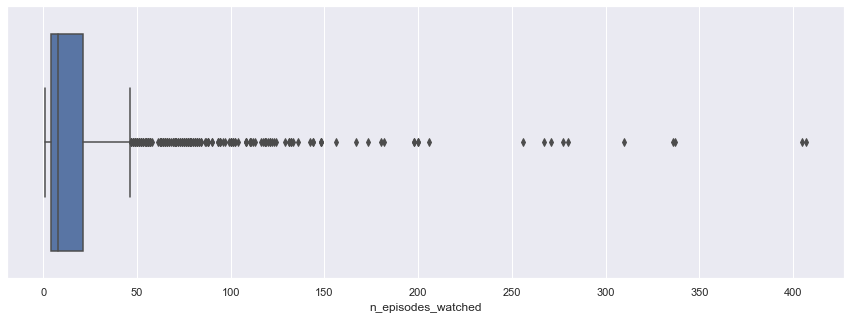

In [30]:
sns.set(rc={"figure.figsize":(15, 5)})
n_episode = sns.boxplot(data = cleaned_itv_data, x = "n_episodes_watched")

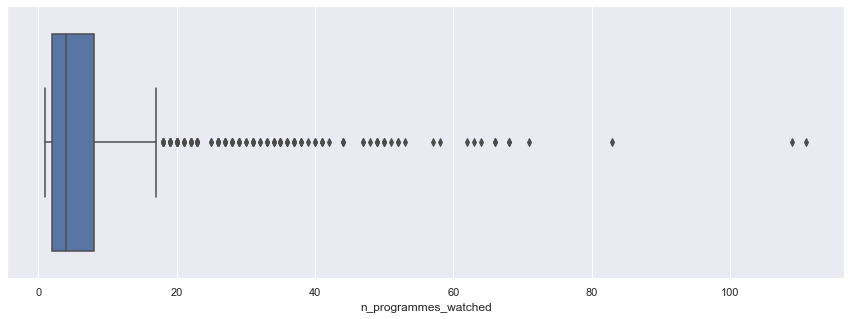

In [31]:
sns.set(rc={"figure.figsize":(15, 5)})
n_programme = sns.boxplot(data = cleaned_itv_data, x = "n_programmes_watched")

In [32]:
def barchat_plot(category_column):
    
    #create a dataframe that contains the category columns, reset the index to remove the user_id column from the table
    category = cleaned_itv_data.loc[:,category_column].reset_index().drop("user_id", axis = 1)
    
    #grouping the dataframe by the "any_spy_among_friends_consumption" column
    grouped = category.groupby("any_spy_among_friends_consumption")
    
    #ploting the corresponding barchat
    plot = grouped.sum().T.plot(kind='bar')
    plot.set_ylabel('Total Consumption (seconds)')

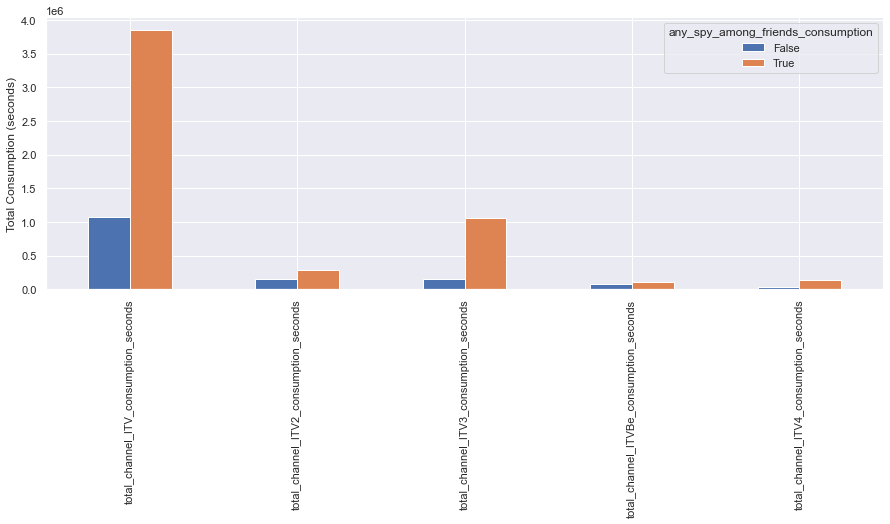

In [33]:
channel = ["total_channel_ITV_consumption_seconds", "total_channel_ITV2_consumption_seconds",
                "total_channel_ITV3_consumption_seconds", "total_channel_ITVBe_consumption_seconds",
                "total_channel_ITV4_consumption_seconds", "any_spy_among_friends_consumption"]

barchat_plot(channel)

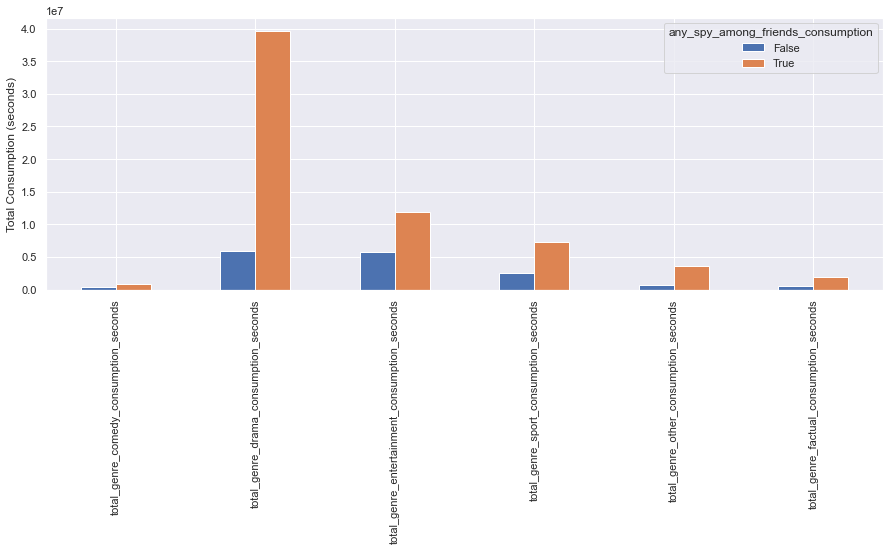

In [34]:
genre = ["total_genre_comedy_consumption_seconds", "total_genre_drama_consumption_seconds",
         "total_genre_entertainment_consumption_seconds", "total_genre_sport_consumption_seconds",
            "total_genre_other_consumption_seconds", "total_genre_factual_consumption_seconds",
             "any_spy_among_friends_consumption"]

barchat_plot(genre)

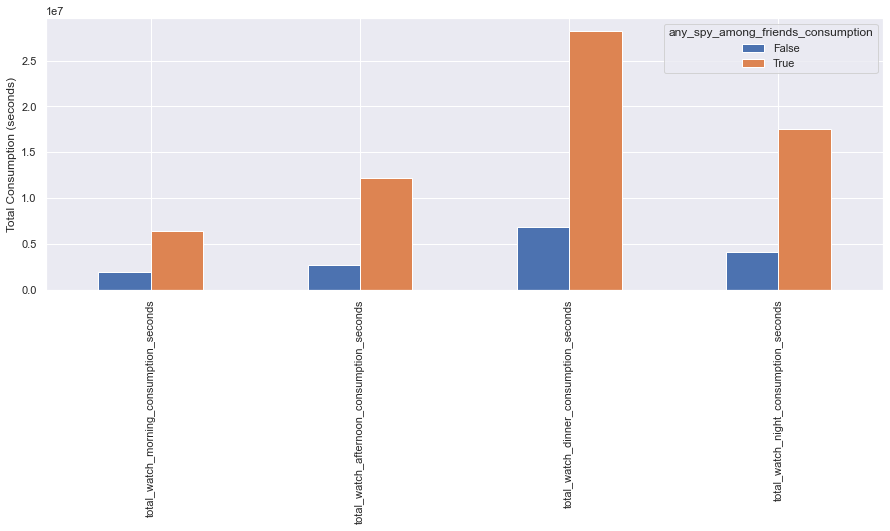

In [35]:
watch = ["total_watch_morning_consumption_seconds",  "total_watch_afternoon_consumption_seconds",
            "total_watch_dinner_consumption_seconds", "total_watch_night_consumption_seconds",
             "any_spy_among_friends_consumption"]

barchat_plot(watch)

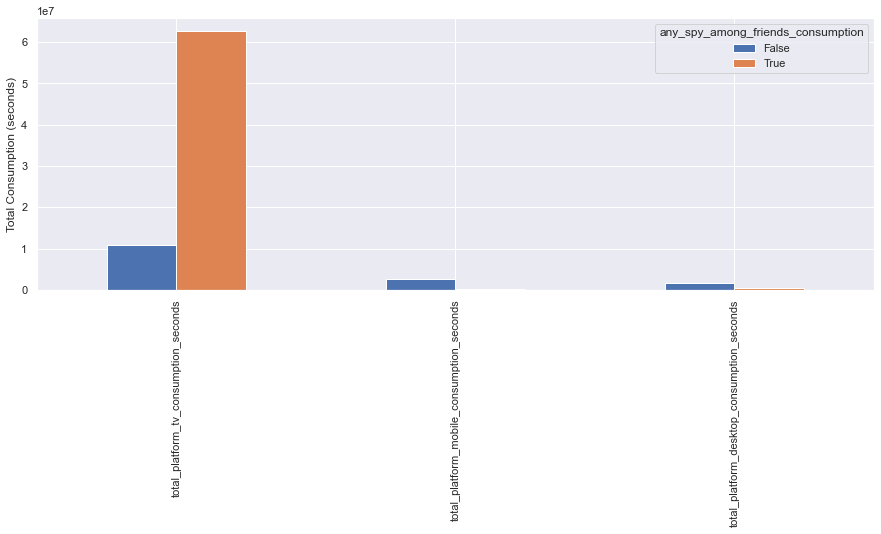

In [36]:
platform = ["total_platform_tv_consumption_seconds","total_platform_mobile_consumption_seconds",
            "total_platform_desktop_consumption_seconds", "any_spy_among_friends_consumption"]

barchat_plot(platform)

<AxesSubplot:>

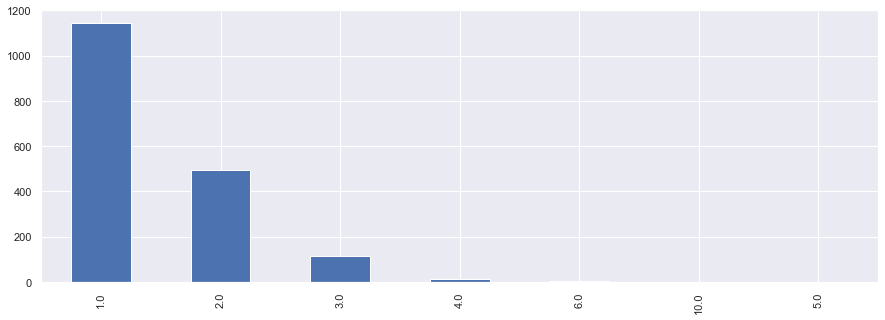

In [37]:
no_device = cleaned_itv_data["n_devices_watched_on"].value_counts()
no_device.plot(kind = "bar")

<AxesSubplot:>

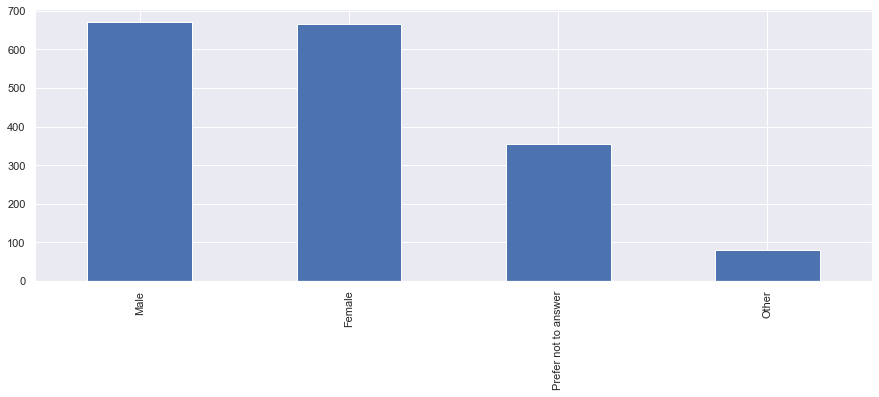

In [38]:
gender = cleaned_itv_data["gender"].value_counts()
gender.plot(kind = "bar")

<AxesSubplot:>

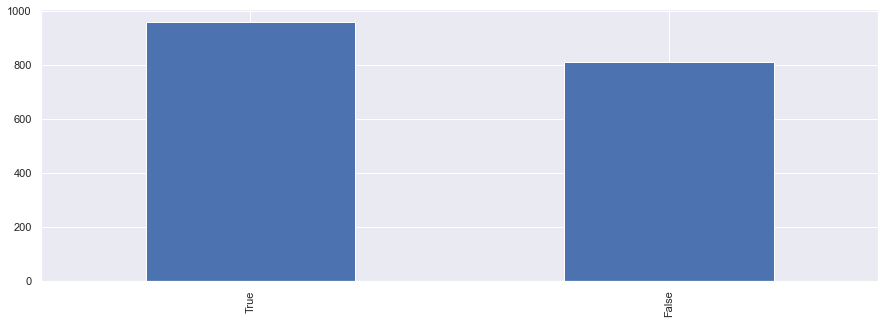

In [39]:
spy = cleaned_itv_data["any_spy_among_friends_consumption"].value_counts()
spy.plot(kind = "bar")

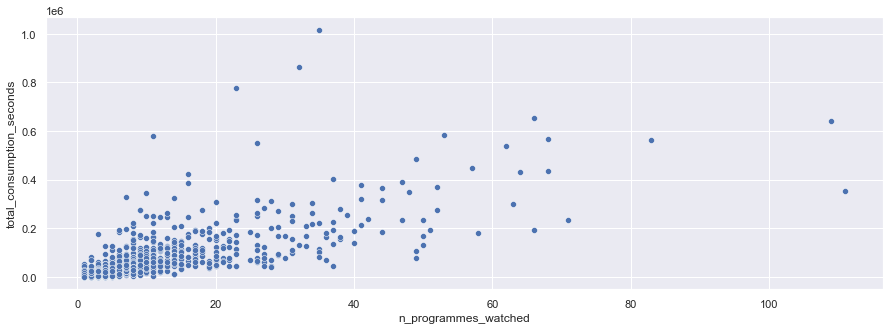

In [40]:
sns.scatterplot(x = "n_programmes_watched", y = 'total_consumption_seconds',data =  cleaned_itv_data)
plt.show()

In [41]:
cleaned_itv_data["top_1_genre"] = cleaned_itv_data["top_3_genres"].apply(lambda x: eval(x)[0])

<AxesSubplot:>

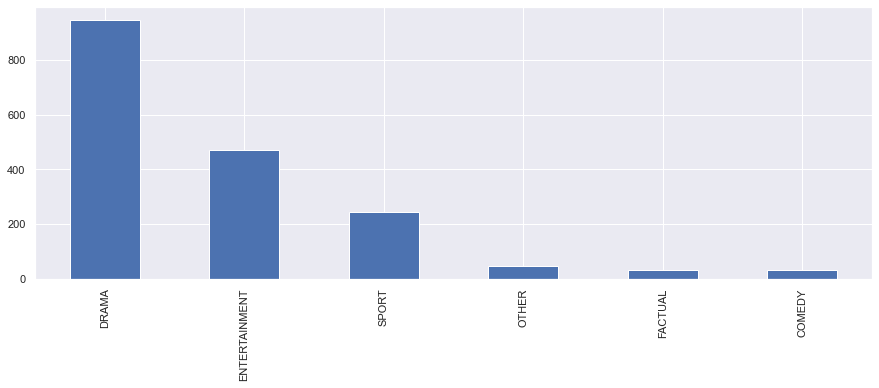

In [42]:
top_1 = cleaned_itv_data["top_1_genre"].value_counts()
top_1.plot(kind = "bar")

In [43]:
def week_days(row):
    week = row["total_consumption_seconds"] - row["total_weekend_consumption_seconds"]
    return week

cleaned_itv_data["total_weekday_consumption_seconds"] = cleaned_itv_data.apply(lambda row : week_days(row), axis = 1)

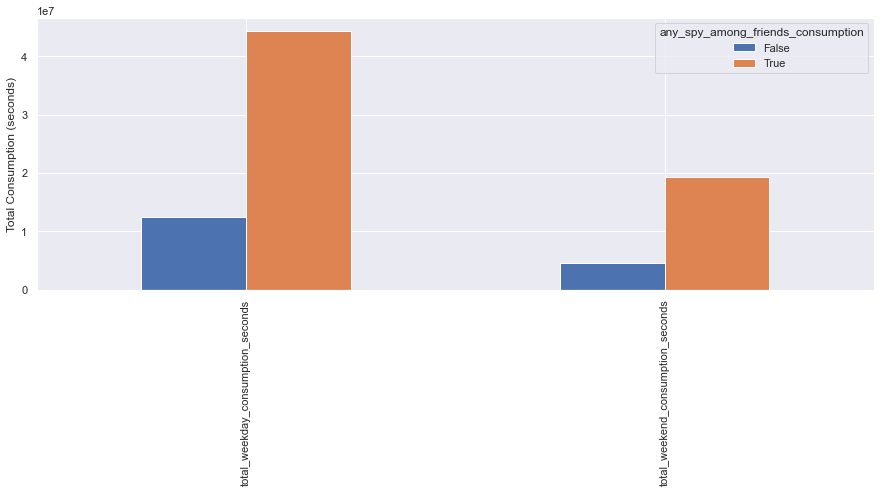

In [44]:
platform = ["total_weekday_consumption_seconds", "total_weekend_consumption_seconds", "any_spy_among_friends_consumption"]
barchat_plot(platform)

### Encoding

In [45]:
# there are some categorical features in the data set, to create a machine learning model, it is easier to use a numberical value
cleaned_itv_data_le = cleaned_itv_data.copy()
le = LabelEncoder()
le_target = ["top_3_programmes", "top_3_genres", "top_3_subgenres", "top_1_genre", "gender", "any_spy_among_friends_consumption"]
cleaned_itv_data_le[le_target] = cleaned_itv_data_le[le_target].apply(le.fit_transform)

In [46]:
cleaned_itv_data_le["any_spy_among_friends_consumption"]

user_id
#ERROR!                                         1
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=    1
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=    1
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=    1
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=    1
                                               ..
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=    1
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=    0
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    0
ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=    0
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    0
Name: any_spy_among_friends_consumption, Length: 1771, dtype: int64

In [47]:
cleaned_itv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, #ERROR! to zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   n_sessions                                     1771 non-null   int64  
 1   n_programmes_watched                           1771 non-null   int64  
 2   n_episodes_watched                             1771 non-null   int64  
 3   top_3_programmes                               1771 non-null   object 
 4   top_3_genres                                   1771 non-null   object 
 5   total_genre_comedy_consumption_seconds         1771 non-null   float64
 6   total_genre_drama_consumption_seconds          1771 non-null   float64
 7   total_genre_entertainment_consumption_seconds  1771 non-null   float64
 8   total_genre_sport_consumption_seconds          1771 non-null   float64
 9   total_genre

C:\Users\user\AppData\Local\Temp\ipykernel_7292\2923343298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_itv_data.corr(), annot=True)


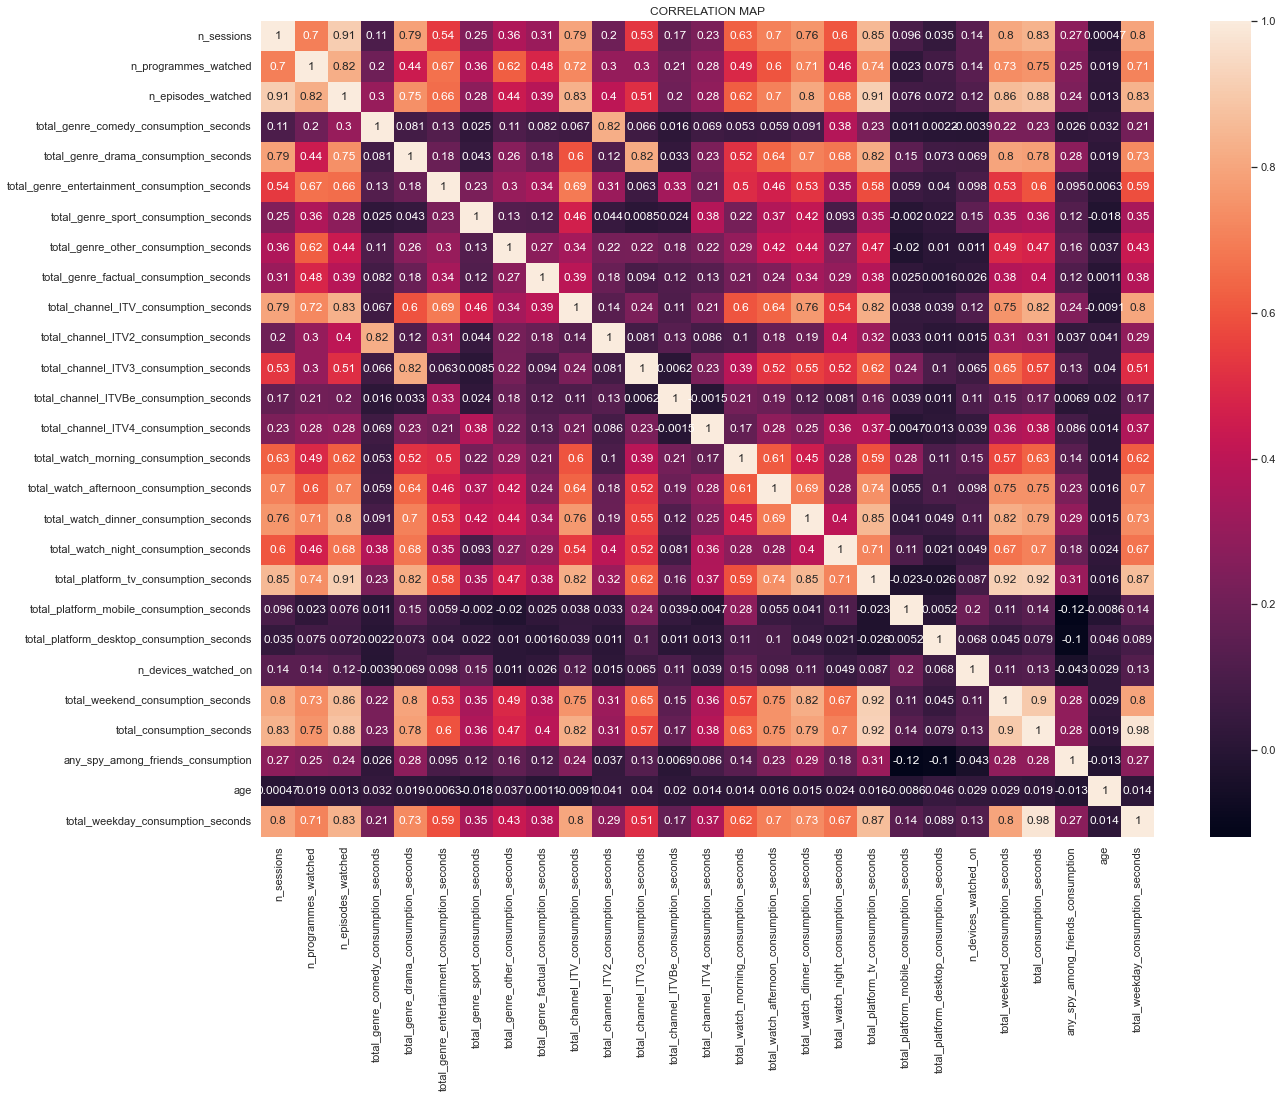

In [48]:
figure = plt.figure(figsize=(20, 15))
sns.heatmap(cleaned_itv_data.corr(), annot=True)
plt.title('CORRELATION MAP')
plt.show()

In [49]:
cleaned_itv_data.loc[:,["total_platform_tv_consumption_seconds", "total_platform_mobile_consumption_seconds",
                                     "total_platform_desktop_consumption_seconds"]]

,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds
user_id,,,
#ERROR!,68075.810754,23937.696359,8223.279594
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,10650.877000,0.000000,0.000000
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,52660.124921,0.000000,0.000000
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,78485.442042,0.000000,0.000000
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,0.000000,0.000000,0.000000
...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,37779.834473,0.000000,0.000000
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,22751.175730,0.000000,0.000000
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,0.000000,56815.310210,0.000000


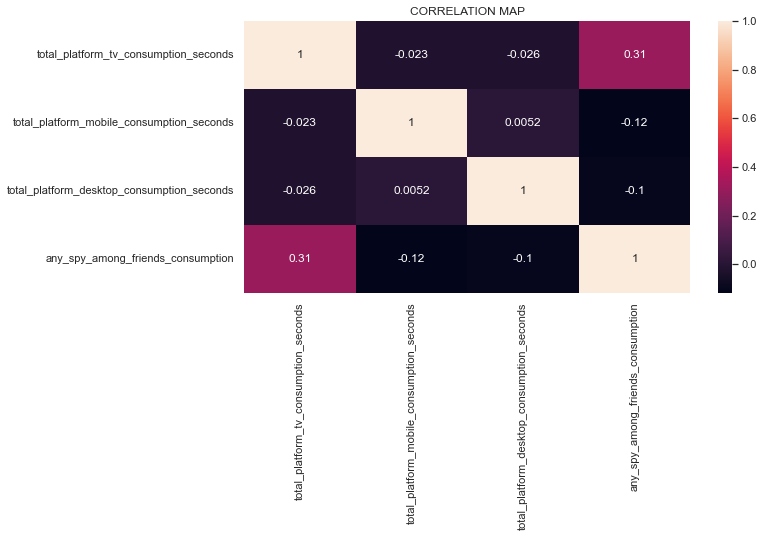

In [50]:
figure = plt.figure(figsize=(10, 5))
sns.heatmap(cleaned_itv_data.loc[:,["total_platform_tv_consumption_seconds", "total_platform_mobile_consumption_seconds",
                                     "total_platform_desktop_consumption_seconds", "any_spy_among_friends_consumption"]].corr(), annot=True)
plt.title('CORRELATION MAP')
plt.show()

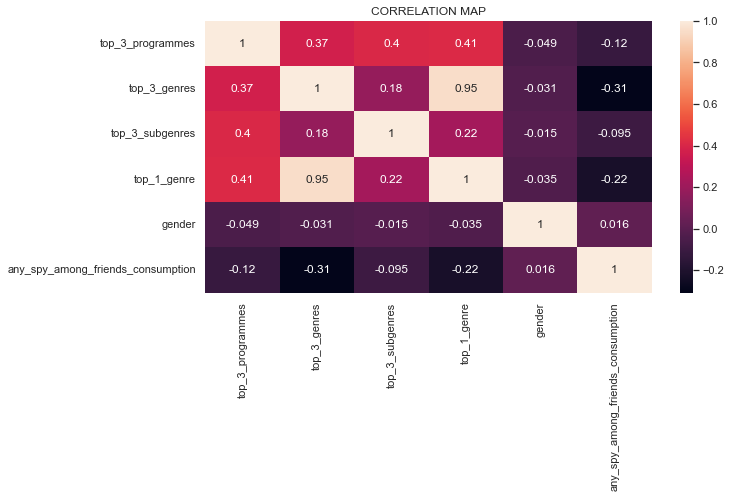

In [51]:
figure = plt.figure(figsize=(10, 5))
sns.heatmap(cleaned_itv_data_le[le_target].corr(), annot=True)
plt.title('CORRELATION MAP')
plt.show()

### Target and Features variable

In [52]:
# Base model
x = cleaned_itv_data_le.drop("any_spy_among_friends_consumption", axis = 1)
y = cleaned_itv_data_le["any_spy_among_friends_consumption"]

### Building the models

In [53]:
def classification_model(model, x, y):
    #spliting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    
    #Standardizing the columns because of the variation in features
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #training the model
    model.fit(x_train, y_train)
    
    #making prediction
    y_pred = model.predict(x_test)
    
    #evaluating the model performance
    c_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(c_matrix)
    print()
    print()
    
    report = classification_report(y_test, y_pred)
    print(" Classification Report")
    print(report)
    print()
    print()
    
    c_matrix_display = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    print("Confusion Matrix Display")
    plt.show()
    print()
    print()
    
    feature_importance = pd.DataFrame(data = model.feature_importances_, index = x.columns, 
                                columns = ["Feature Importance"]).sort_values("Feature Importance")
    print("Feature Importance")
    return feature_importance
    

    


Confusion Matrix
[[200  31]
 [ 39 262]]


 Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       231
           1       0.89      0.87      0.88       301

    accuracy                           0.87       532
   macro avg       0.87      0.87      0.87       532
weighted avg       0.87      0.87      0.87       532



Confusion Matrix Display


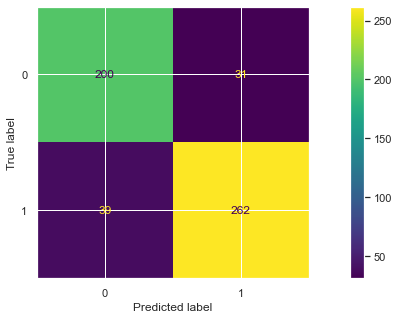



Feature Importance


,Feature Importance
total_genre_comedy_consumption_seconds,0.000000
n_devices_watched_on,0.000000
total_genre_other_consumption_seconds,0.000000
total_watch_morning_consumption_seconds,0.000000
top_1_genre,0.000000
total_channel_ITV4_consumption_seconds,0.001621
gender,0.002431
n_episodes_watched,0.004052
total_watch_night_consumption_seconds,0.004586
total_channel_ITV2_consumption_seconds,0.005402


In [54]:
DT = DecisionTreeClassifier()
classification_model(DT, x , y)

In [55]:
# new_x = x.drop(["total_watch_morning_consumption_seconds", "total_genre_other_consumption_seconds", "top_1_genre", 
#                "n_devices_watched_on", "total_genre_comedy_consumption_seconds"], axis = 1)

In [56]:
features_to_drop = ["total_watch_morning_consumption_seconds", "total_genre_other_consumption_seconds", "top_1_genre", 
                   "n_devices_watched_on", "total_genre_comedy_consumption_seconds", "gender", "age", 
                   "total_channel_ITV4_consumption_seconds", "total_watch_night_consumption_seconds", 
                    "total_channel_ITV2_consumption_seconds", "total_watch_afternoon_consumption_seconds",
                    "total_genre_factual_consumption_seconds", "total_watch_morning_consumption_seconds", 
                   "total_genre_other_consumption_seconds", "top_1_genre", "n_devices_watched_on",
                   "total_genre_comedy_consumption_seconds"]

In [57]:
new_x = x.drop(features_to_drop, axis = 1)

Confusion Matrix
[[200  31]
 [ 36 265]]


 Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       231
           1       0.90      0.88      0.89       301

    accuracy                           0.87       532
   macro avg       0.87      0.87      0.87       532
weighted avg       0.87      0.87      0.87       532



Confusion Matrix Display


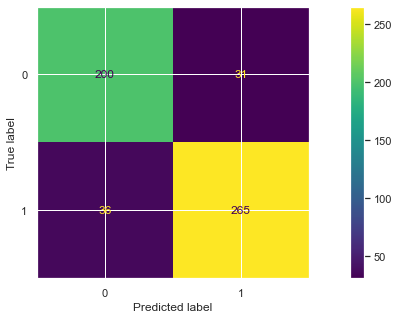



Feature Importance


,Feature Importance
n_episodes_watched,0.000000
total_platform_tv_consumption_seconds,0.006177
total_channel_ITVBe_consumption_seconds,0.008949
total_genre_sport_consumption_seconds,0.009553
total_weekday_consumption_seconds,0.015315
total_platform_desktop_consumption_seconds,0.016391
total_channel_ITV3_consumption_seconds,0.017371
total_watch_dinner_consumption_seconds,0.017460
total_channel_ITV_consumption_seconds,0.018998
total_genre_entertainment_consumption_seconds,0.019047


In [58]:
classification_model(DT, new_x, y)

### Random Forest Classifier

Confusion Matrix
[[207  24]
 [ 30 271]]


 Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       231
           1       0.92      0.90      0.91       301

    accuracy                           0.90       532
   macro avg       0.90      0.90      0.90       532
weighted avg       0.90      0.90      0.90       532



Confusion Matrix Display


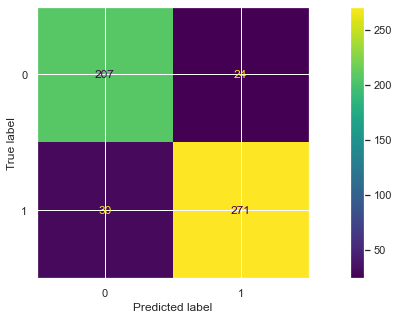



Feature Importance


,Feature Importance
total_channel_ITVBe_consumption_seconds,0.006842
total_genre_sport_consumption_seconds,0.008826
total_channel_ITV3_consumption_seconds,0.016456
n_episodes_watched,0.023121
total_platform_desktop_consumption_seconds,0.023399
n_programmes_watched,0.024845
total_weekend_consumption_seconds,0.030704
total_weekday_consumption_seconds,0.033704
total_channel_ITV_consumption_seconds,0.034783
n_sessions,0.036274


In [59]:
RF = RandomForestClassifier()
classification_model(RF, new_x, y)

### XGBoost

Confusion Matrix
[[209  22]
 [ 25 276]]


 Classification Report
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       231
           1       0.93      0.92      0.92       301

    accuracy                           0.91       532
   macro avg       0.91      0.91      0.91       532
weighted avg       0.91      0.91      0.91       532



Confusion Matrix Display


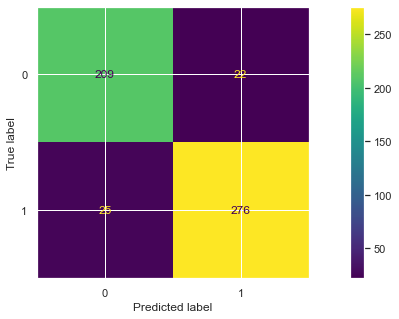



Feature Importance


,Feature Importance
total_channel_ITVBe_consumption_seconds,0.007613
n_episodes_watched,0.013950
total_weekday_consumption_seconds,0.015471
total_weekend_consumption_seconds,0.015592
total_watch_dinner_consumption_seconds,0.018580
total_consumption_seconds,0.018710
total_genre_entertainment_consumption_seconds,0.021732
total_channel_ITV_consumption_seconds,0.021904
top_3_genres,0.022355
total_genre_sport_consumption_seconds,0.024643


In [60]:
XGB = XGBClassifier()
classification_model(XGB, new_x , y)

In [61]:
def accuracy(model, x, y):
    #spliting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    
    #Standardizing the columns because of the variation in features
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #training the model
    model.fit(x_train, y_train)
    
    #making prediction
    y_pred = model.predict(x_test)
    
    #return the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
    

In [62]:
data ={"Models" : ["Decision Tree", "Random Forest", "XGBoost"], 
       "Accuracy" : [accuracy(DT, new_x , y), accuracy(RF, new_x , y), accuracy(XGB, new_x , y)]} 

accuracy_table = pd.DataFrame(data)
accuracy_table

,Models,Accuracy
0,Decision Tree,0.885338
1,Random Forest,0.887218
2,XGBoost,0.911654


In [63]:
def feature_importance(model, x, y):
    #spliting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    
    #Standardizing the columns because of the variation in features
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #training the model
    model.fit(x_train, y_train)
    
    #making prediction
    y_pred = model.predict(x_test)
    if model == DT:
        heading = "Decision Tree"
    elif model == RF:
        heading = "Random Forest"
    else:
        heading = "XGBoost"
    
    #return the feature importance of the model
    feature_importance = pd.DataFrame(data = model.feature_importances_, index = x.columns, 
                                      columns = [f"{heading} Feature Importance"])
    return feature_importance

In [64]:
feature_importance_table = pd.concat([feature_importance(DT, new_x , y), feature_importance(RF, new_x , y), 
                    feature_importance(XGB, new_x , y)], axis = 1)

feature_importance_table

,Decision Tree Feature Importance,Random Forest Feature Importance,XGBoost Feature Importance
n_sessions,0.061468,0.037955,0.047851
n_programmes_watched,0.035421,0.023442,0.040281
n_episodes_watched,0.008840,0.025615,0.013950
top_3_programmes,0.112699,0.092227,0.059432
top_3_genres,0.022300,0.058473,0.022355
total_genre_drama_consumption_seconds,0.398310,0.204316,0.284406
total_genre_entertainment_consumption_seconds,0.019009,0.038693,0.021732
total_genre_sport_consumption_seconds,0.007392,0.008651,0.024643
total_channel_ITV_consumption_seconds,0.015664,0.037928,0.021904
total_channel_ITV3_consumption_seconds,0.019323,0.016940,0.026012


<function matplotlib.pyplot.show(close=None, block=None)>

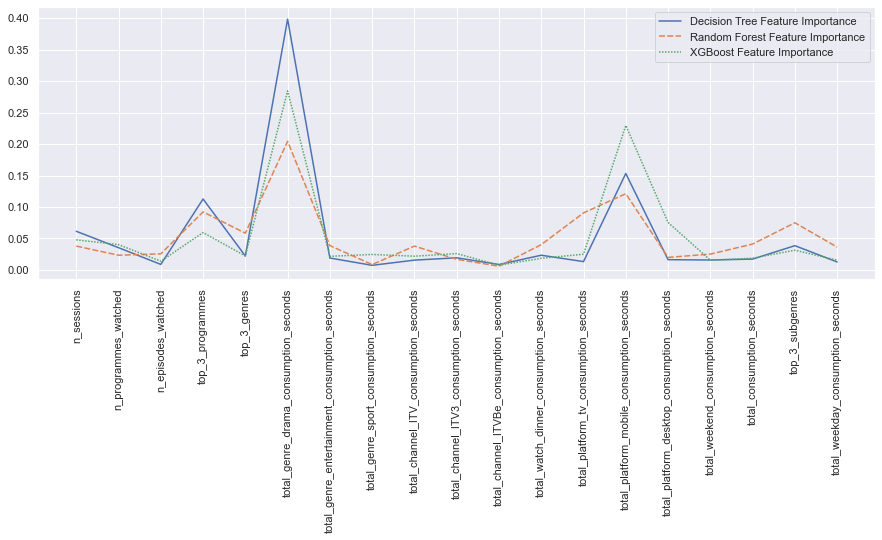

In [65]:
sns.lineplot(data = feature_importance_table)
plt.xticks(rotation=90)
plt.show

#### To answer the underlaying questions

1. From the three models, XGBoost Classifier performs better than the other two models 


2. The most significant features can be seen from the feature importance table and the the plot above. 
   The most important one for the three models is the "total_genre_drama_consumption_seconds".
  
  
3. Yes, I think knowing the nationality of the users might help to better predict the performance of the model,
   because I believe a British might be more interested in the show more than people of other nationality because 
   it tell a story about the history of the country


4. (a) Decision Tree:
            Decision Trees are a type of supervised learning algorithm used for both regression and classification tasks.
            The algorithm builds a tree-like model of decisions and their possible consequences, recursively splitting the
            data into subsets based on the feature values. At each internal node, the algorithm selects a feature and 
            a split point to maximize the separation of the target variable, and continues until the leaves represent pure 
            homogeneous sets. The final result is a set of rules that can be easily interpreted and implemented.
            
    (b) Random Forest:
            Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. 
            It creates multiple trees with random subsets of the features and training instances, and aggregates their 
            predictions by averaging for regression or voting for classification. By combining the results of many trees, 
            random forests reduce the overfitting of a single decision tree and increase the overall accuracy
            
    (c) XGBoost:
            XGBoost (eXtreme Gradient Boosting) is a highly optimized and scalable implementation of gradient boosting that
             has become one of the most popular algorithms in recent years. XGBoost uses decision trees as weak learners, 
             but unlike Random Forest, XGBoost trains each tree sequentially,with each tree learning from the mistakes of
             the previous tree. The learning process also involves regularization terms and optimizes for the objective                      function directly rather than using greedy search as in decision trees. XGBoost has proven to be effective for                  many tasks, including binary classification, multiclass classification, and regression.